In [1]:
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
cos = nn.CosineSimilarity(dim=-1)
keys = torch.load("/dataset/zhuotaotian/bhpeng/vectordb/output/model_6*20_all_0.2.pth")
keys = keys['keys']
keys.shape

torch.Size([1, 6, 20, 128])

In [7]:
sim = []
for i in range(6):
    s = torch.empty(20,20)
    for j in range(20):
        for k in range(20):
            s[j,k] = cos(keys[0, i, j], keys[0, i, k])
            sim.append(s)
similarity_matrix = sim[0].numpy()

(20, 20)

TypeError: Invalid shape () for image data

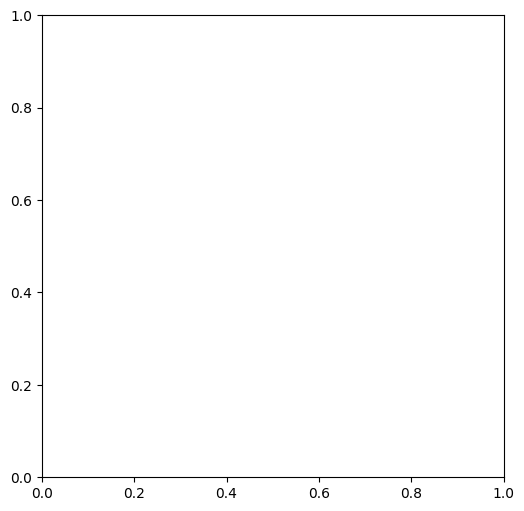

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the similarity matrix with 'viridis' colormap
im = ax.imshow(similarity_matrix, cmap='viridis')

# Customize the plot
ax.set_title('Similarity Matrix', fontsize=18)

# Set integer values for x and y ticks
ax.set_xticks(np.arange(similarity_matrix.shape[1]))
ax.set_yticks(np.arange(similarity_matrix.shape[0]))

# Set tick labels as integers
ax.set_xticklabels(np.arange(similarity_matrix.shape[1]))
ax.set_yticklabels(np.arange(similarity_matrix.shape[0]))

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Similarity', rotation=-90, va="bottom")

# Display the plot
plt.tight_layout()
plt.savefig("./figs/similarity_matrix_0.pdf")
plt.show()